In [126]:
#import all the necessary library at the beginning
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
sb.set()

In [127]:
house = pd.read_csv("train.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Problem 1 : Predicting CentralAir using SalePrice
**In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.**<br>
**a) Create appropriate datasets for Train and Test in an 75:25 ratio and fit two Classification Tree models (of max depth 3 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.**<br>
**b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?**<br>

After comparing the two model, I think that the model of max depth 4 is a better model. This is because comparing the classification accuracy, true positive rate and false positive rate, there is a improvement from the first model to the second model. It shows that it has a higher prediction accuray than the first model.

In [128]:
#extracting the data from the 'house' dataset
sp = pd.DataFrame(house['SalePrice'])
ca = pd.DataFrame(house['CentralAir'])

#split the data into two train and test data set
ca_train, ca_test, sp_train, sp_test = train_test_split(ca, sp, test_size = 0.25)

### a) fit Classification Tree model(of max depth 3) on the trian set

[Text(0.5, 0.875, 'SalePrice <= 107700.0\ngini = 0.116\nsamples = 1095\nvalue = [68, 1027]\nclass = Y'),
 Text(0.25, 0.625, 'SalePrice <= 61691.5\ngini = 0.448\nsamples = 115\nvalue = [39, 76]\nclass = Y'),
 Text(0.125, 0.375, 'SalePrice <= 46000.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = N'),
 Text(0.375, 0.375, 'SalePrice <= 106125.0\ngini = 0.405\nsamples = 103\nvalue = [29, 74]\nclass = Y'),
 Text(0.3125, 0.125, 'gini = 0.378\nsamples = 95\nvalue = [24, 71]\nclass = Y'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = N'),
 Text(0.75, 0.625, 'SalePrice <= 137950.0\ngini = 0.057\nsamples = 980\nvalue = [29, 951]\nclass = Y'),
 Text(0.625, 0.375, 'SalePrice <= 137700.0\ngini = 0.149\nsamples = 235\nvalue = [19, 216]\nclass = Y'),
 Text(0.5625, 0.125, 'gini = 0.142\nsamples = 234\nvalue = [18, 21

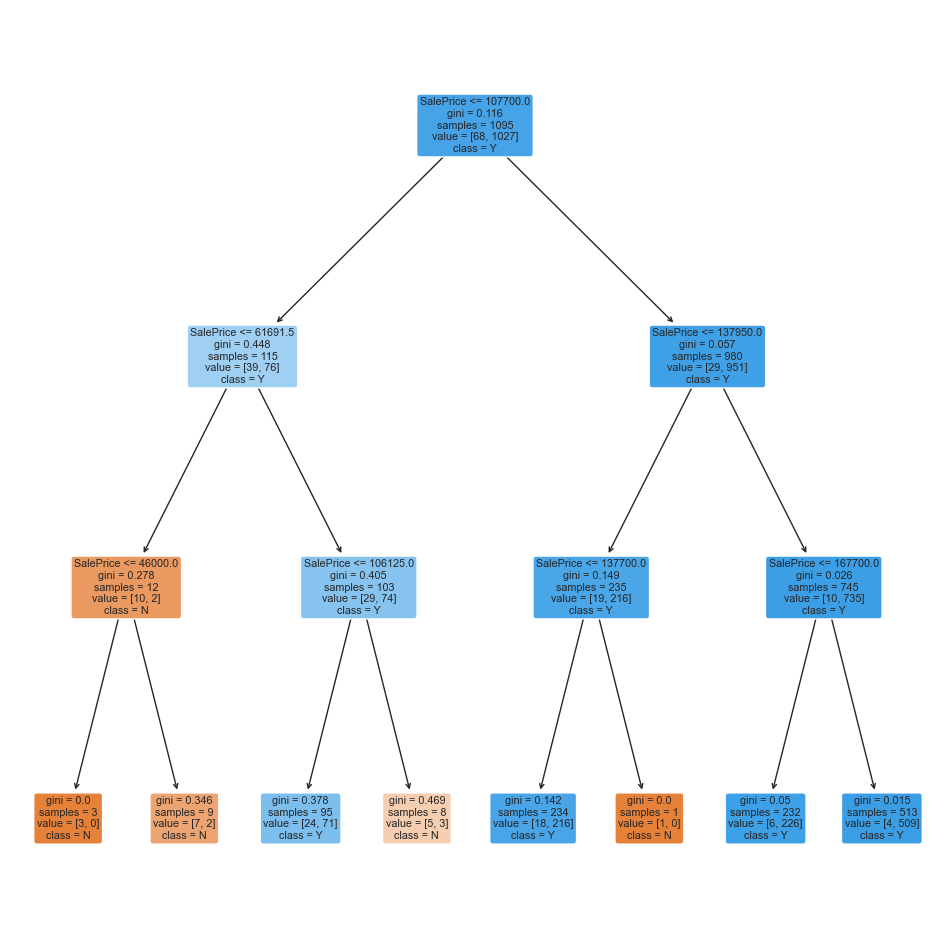

In [129]:
#create a decision tree classifier (of max_depth 3)
dectree3 = DecisionTreeClassifier(max_depth = 3)

#train the model
dectree3.fit(sp_train, ca_train)

#plot the decision tree
f = plt.figure(figsize=(12,12))

plot_tree(dectree3, filled = True, rounded = True, feature_names = ["SalePrice"], class_names = ["N", "Y"])

### a) fit Classification Tree model(of max depth 4) on the trian set

[Text(0.48, 0.9, 'SalePrice <= 107700.0\ngini = 0.116\nsamples = 1095\nvalue = [68, 1027]\nclass = Y'),
 Text(0.22, 0.7, 'SalePrice <= 61691.5\ngini = 0.448\nsamples = 115\nvalue = [39, 76]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = N'),
 Text(0.36, 0.5, 'SalePrice <= 106125.0\ngini = 0.405\nsamples = 103\nvalue = [29, 74]\nclass = Y'),
 Text(0.28, 0.3, 'SalePrice <= 98150.0\ngini = 0.378\nsamples = 95\nvalue = [24, 71]\nclass = Y'),
 Text(0.24, 0.1, 'gini = 0.427\nsamples = 68\nvalue = [21, 47]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.198\nsamples = 27\nvalue = [3, 24]\nclass = Y'),
 Text(0.44, 0.3, 'SalePrice <= 

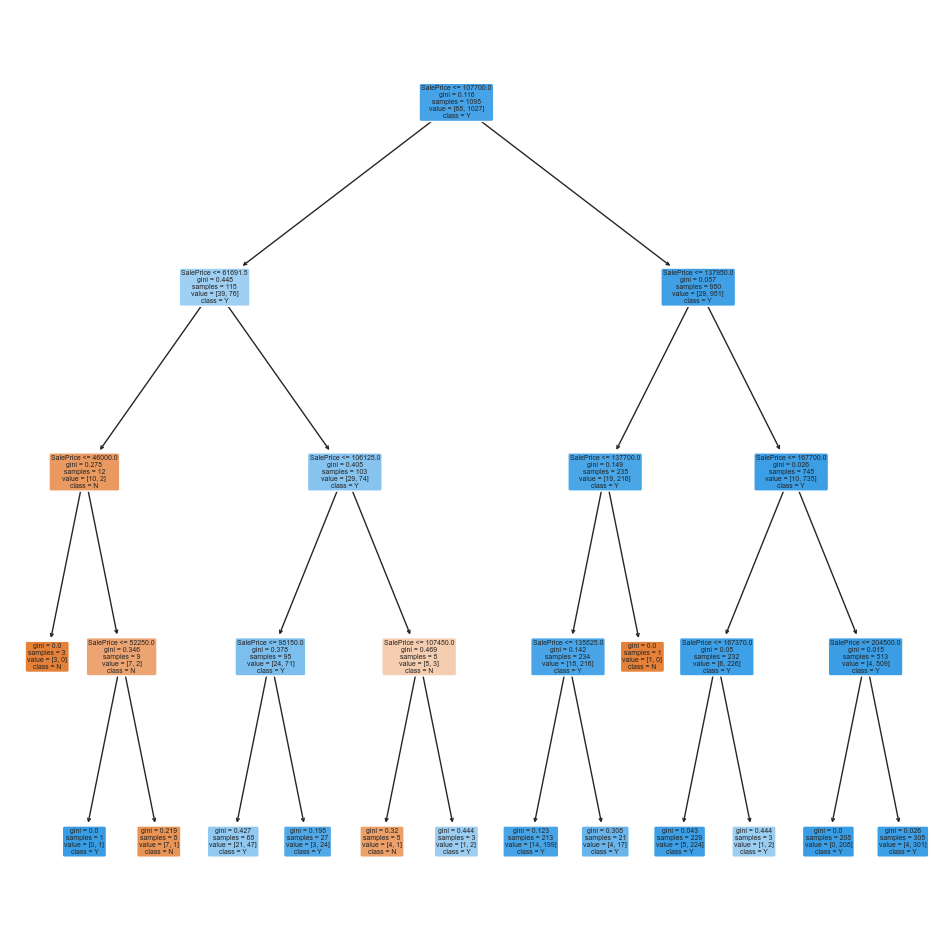

In [130]:
#create a decision tree classifier (of max_depth 4)
dectree4 = DecisionTreeClassifier(max_depth = 4)

#train the model
dectree4.fit(sp_train, ca_train)

#plot the decision tree
f = plt.figure(figsize=(12,12))

plot_tree(dectree4, filled = True, rounded = True, feature_names = ["SalePrice"], class_names = ["N", "Y"])

### b) The confusion table, classification accuracy, true positive rate, false positive rate for Tree Model of <br> depth 3

The classification accuracy of SalePrice Train	: 0.947945205479452
The classification accuracy of SalePrice Test	: 0.9287671232876712

For train set
The True Positive Rate of trian set for this model 	: 0.9951314508276533
The False Positive Rate of train set for this model 	: 0.23529411764705882

For test set
The True Positive Rate of test set for this model 	: 0.9940828402366864
The False Positive Rate of test set for this model 	: 0.1111111111111111


<Axes: >

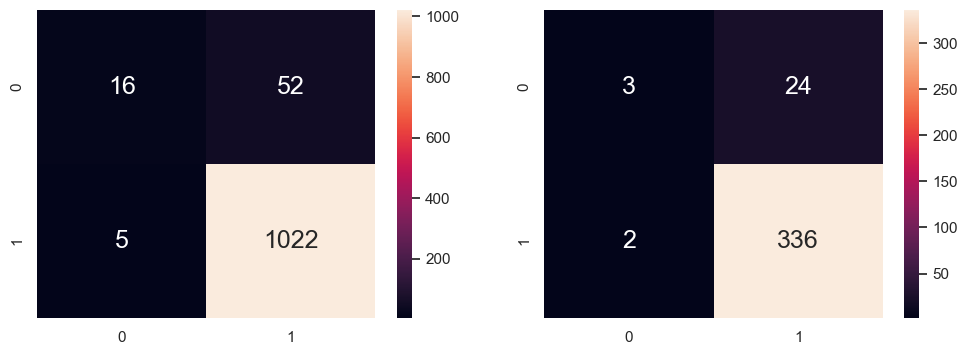

In [131]:
#Predict the CentralAir with the sp_train and sp_test
ca_train_pred3 = dectree3.predict(sp_train)
ca_test_pred3 = dectree3.predict(sp_test)

#Print the classification accuracy
print("The classification accuracy of SalePrice Train\t:", dectree3.score(sp_train, ca_train))
print("The classification accuracy of SalePrice Test\t:", dectree3.score(sp_test, ca_test))

print()

#Print the TPR and FPR for train set
cm3_tr = confusion_matrix(ca_train, ca_train_pred3)
FP_tr_3 = cm3_tr[0][1]
FN_tr_3 = cm3_tr[1][0]
TP_tr_3 = cm3_tr[1][1]
TN_tr_3 = cm3_tr[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_3/(FN_tr_3 + TP_tr_3))
print("The False Positive Rate of train set for this model \t:", TN_tr_3/(TN_tr_3 + FP_tr_3))

print()

#Print the TPR and FPR for test set
cm3_tt = confusion_matrix(ca_test, ca_test_pred3)
FP_tt_3 = cm3_tt[0][1]
FN_tt_3 = cm3_tt[1][0]
TP_tt_3 = cm3_tt[1][1]
TN_tt_3 = cm3_tt[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_3/(FN_tt_3 + TP_tt_3))
print("The False Positive Rate of test set for this model \t:", TN_tt_3/(TN_tt_3 + FP_tt_3))

#Print the two-way confusion map for train(left) and test(right)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred3),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred3), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### b) The confusion table, classification accuracy, true positive rate, false positive rate for Tree Model of <br> depth 4

The classification accuracy of SalePrice Train	: 0.9497716894977168
The classification accuracy of SalePrice Test	: 0.9287671232876712

For train set
The True Positive Rate of trian set for this model 	: 0.9980525803310614
The False Positive Rate of train set for this model 	: 0.22058823529411764

For test set
The True Positive Rate of test set for this model 	: 0.9940828402366864
The False Positive Rate of test set for this model 	: 0.1111111111111111


<Axes: >

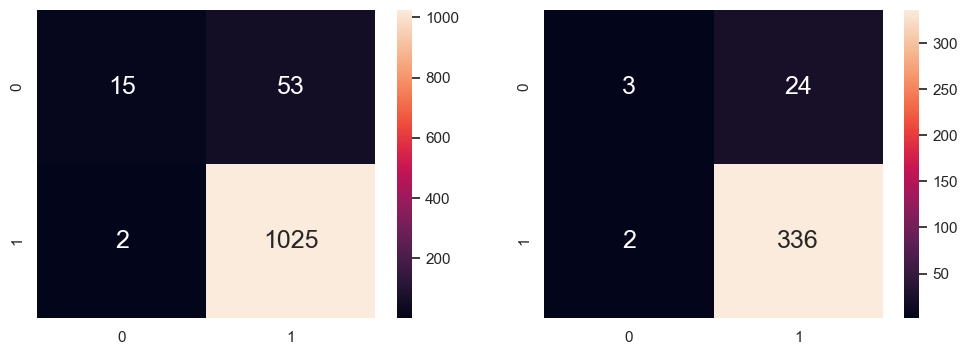

In [132]:
#Predict the CentralAir with the sp_train and sp_test
ca_train_pred4 = dectree4.predict(sp_train)
ca_test_pred4 = dectree4.predict(sp_test)

#Print the classification accuracy
print("The classification accuracy of SalePrice Train\t:", dectree4.score(sp_train, ca_train))
print("The classification accuracy of SalePrice Test\t:", dectree4.score(sp_test, ca_test))

print()

#Print the TPR and FPR for train set
cm4_tr = confusion_matrix(ca_train, ca_train_pred4)
FP_tr_4 = cm4_tr[0][1]
FN_tr_4 = cm4_tr[1][0]
TP_tr_4 = cm4_tr[1][1]
TN_tr_4 = cm4_tr[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_4/(FN_tr_4 + TP_tr_4))
print("The False Positive Rate of train set for this model \t:", TN_tr_4/(TN_tr_4 + FP_tr_4))

print()

#Print the TPR and FPR for test set
cm4_tt = confusion_matrix(ca_test, ca_test_pred4)
FP_tt_4 = cm4_tt[0][1]
FN_tt_4 = cm4_tt[1][0]
TP_tt_4 = cm4_tt[1][1]
TN_tt_4 = cm4_tt[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_4/(FN_tt_4 + TP_tt_4))
print("The False Positive Rate of test set for this model \t:", TN_tt_4/(TN_tt_4 + FP_tt_4))

#Print the two-way confusion map for train(left) and test(right)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred4),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred4), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Problem 2 : Predicting CentralAir using Other Variables<br>
**Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 3) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.**

I think that Saleprice is the best predictpr because it has overall the highest classification accuracy in both train and test set.

### For overallQual

In [133]:
oq = pd.DataFrame(house['OverallQual'])

#split the data into two train and test data set
ca_train, ca_test, oq_train, oq_test = train_test_split(ca, oq, test_size = 0.25)

[Text(0.4444444444444444, 0.875, 'OverallQual <= 3.5\ngini = 0.121\nsamples = 1095\nvalue = [71, 1024]\nclass = Y'),
 Text(0.2222222222222222, 0.625, 'OverallQual <= 2.5\ngini = 0.49\nsamples = 21\nvalue = [12, 9]\nclass = N'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(0.3333333333333333, 0.375, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]\nclass = Y'),
 Text(0.6666666666666666, 0.625, 'OverallQual <= 4.5\ngini = 0.104\nsamples = 1074\nvalue = [59, 1015]\nclass = Y'),
 Text(0.5555555555555556, 0.375, 'gini = 0.295\nsamples = 89\nvalue = [16, 73]\nclass = Y'),
 Text(0.7777777777777778, 0.375, 'OverallQual <= 6.5\ngini = 0.083\nsamples = 985\nvalue = [43, 942]\nclass = Y'),
 Text(0.6666666666666666, 0.125, 'gini = 0.12\nsamples = 579\nvalue = [37, 542]\nclass = Y'),
 Text(0.8888888888888888, 0.125, 'gini = 0.029\nsamples = 406\nvalue = [6, 400]\nclass = Y')]

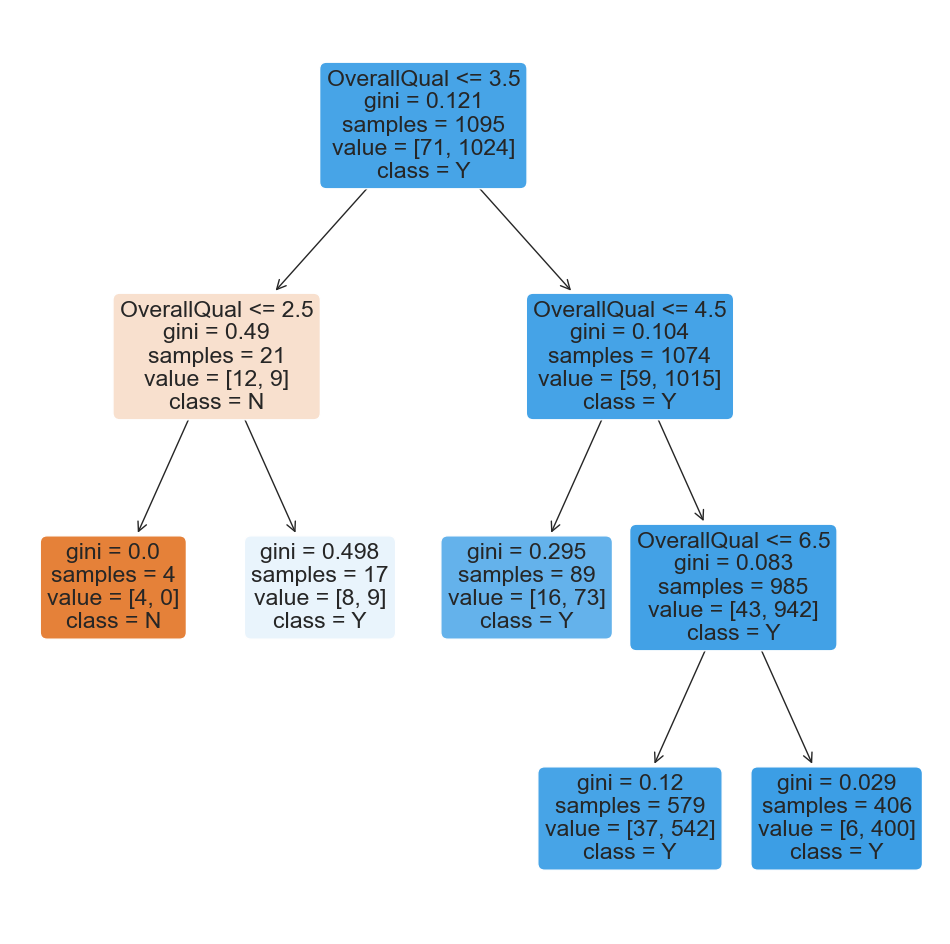

In [134]:
#create a decision tree classifier (of max_depth 3)
dectree3_oq = DecisionTreeClassifier(max_depth = 3)

#train the model
dectree3_oq.fit(oq_train, ca_train)

#plot the decision tree
f = plt.figure(figsize=(12,12))

plot_tree(dectree3_oq, filled = True, rounded = True, feature_names = ["OverallQual"], class_names = ["N", "Y"])

The classification accuracy of OverallQual Train	: 0.9388127853881278
The classification accuracy of OverallQual Test	: 0.936986301369863

For train set
The True Positive Rate of trian set for this model 	: 1.0
The False Positive Rate of train set for this model 	: 0.056338028169014086

For test set
The True Positive Rate of test set for this model 	: 1.0
The False Positive Rate of test set for this model 	: 0.041666666666666664


<Axes: >

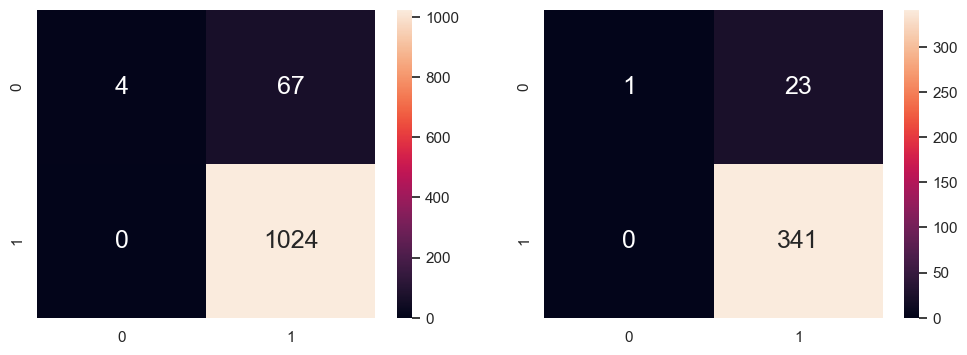

In [135]:
#Predict the CentralAir with the oq_train and oq_test
ca_train_pred3_oq = dectree3_oq.predict(oq_train)
ca_test_pred3_oq = dectree3_oq.predict(oq_test)

#Print the classification accuracy
print("The classification accuracy of OverallQual Train\t:", dectree3_oq.score(oq_train, ca_train))
print("The classification accuracy of OverallQual Test\t:", dectree3_oq.score(oq_test, ca_test))

print()

#Print the TPR and FPR for train set
cm3_tr_oq = confusion_matrix(ca_train, ca_train_pred3_oq)
FP_tr_3_oq = cm3_tr_oq[0][1]
FN_tr_3_oq = cm3_tr_oq[1][0]
TP_tr_3_oq = cm3_tr_oq[1][1]
TN_tr_3_oq = cm3_tr_oq[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_3_oq/(FN_tr_3_oq + TP_tr_3_oq))
print("The False Positive Rate of train set for this model \t:", TN_tr_3_oq/(TN_tr_3_oq + FP_tr_3_oq))

print()

#Print the TPR and FPR for test set
cm3_tt_oq = confusion_matrix(ca_test, ca_test_pred3_oq)
FP_tt_3_oq = cm3_tt_oq[0][1]
FN_tt_3_oq = cm3_tt_oq[1][0]
TP_tt_3_oq = cm3_tt_oq[1][1]
TN_tt_3_oq = cm3_tt_oq[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_3_oq/(FN_tt_3_oq + TP_tt_3_oq))
print("The False Positive Rate of test set for this model \t:", TN_tt_3_oq/(TN_tt_3_oq + FP_tt_3_oq))

#Print the two-way confusion map for train(left) and test(right)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred3_oq),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred3_oq), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### For Year Built

In [136]:
yb = pd.DataFrame(house['YearBuilt'])

#split the data into two train and test data set
ca_train, ca_test, yb_train, yb_test = train_test_split(ca, yb, test_size = 0.25)

[Text(0.5, 0.875, 'YearBuilt <= 1927.5\ngini = 0.126\nsamples = 1095\nvalue = [74, 1021]\nclass = Y'),
 Text(0.25, 0.625, 'YearBuilt <= 1917.5\ngini = 0.441\nsamples = 137\nvalue = [45, 92]\nclass = Y'),
 Text(0.125, 0.375, 'YearBuilt <= 1895.5\ngini = 0.498\nsamples = 58\nvalue = [27, 31]\nclass = Y'),
 Text(0.0625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = Y'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 49\nvalue = [25, 24]\nclass = N'),
 Text(0.375, 0.375, 'YearBuilt <= 1924.5\ngini = 0.352\nsamples = 79\nvalue = [18, 61]\nclass = Y'),
 Text(0.3125, 0.125, 'gini = 0.299\nsamples = 60\nvalue = [11, 49]\nclass = Y'),
 Text(0.4375, 0.125, 'gini = 0.465\nsamples = 19\nvalue = [7, 12]\nclass = Y'),
 Text(0.75, 0.625, 'YearBuilt <= 1955.5\ngini = 0.059\nsamples = 958\nvalue = [29, 929]\nclass = Y'),
 Text(0.625, 0.375, 'YearBuilt <= 1940.5\ngini = 0.236\nsamples = 168\nvalue = [23, 145]\nclass = Y'),
 Text(0.5625, 0.125, 'gini = 0.128\nsamples = 58\nvalue = [4, 54]\nclas

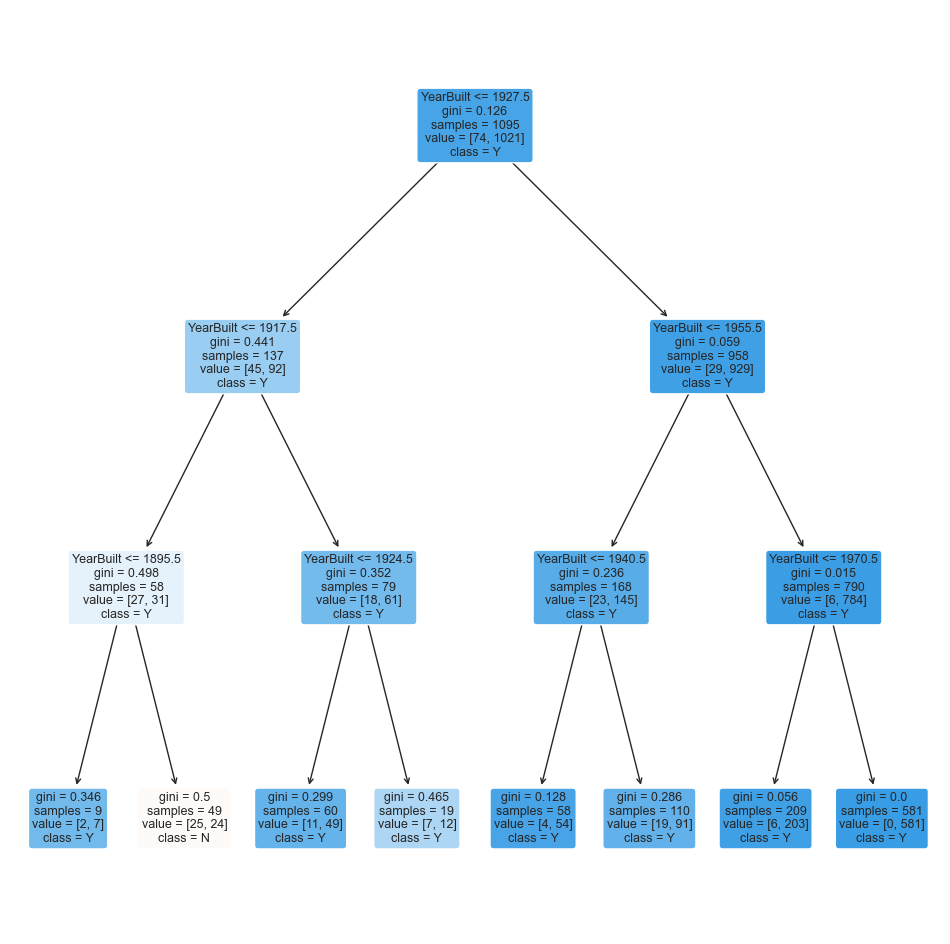

In [137]:
#create a decision tree classifier (of max_depth 3)
dectree3_yb = DecisionTreeClassifier(max_depth = 3)

#train the model
dectree3_yb.fit(yb_train, ca_train)

#plot the decision tree
f = plt.figure(figsize=(12,12))

plot_tree(dectree3_yb, filled = True, rounded = True, feature_names = ["YearBuilt"], class_names = ["N", "Y"])

The classification accuracy of YearBuilt Train	: 0.9333333333333333
The classification accuracy of YearBuilt Test	: 0.9287671232876712

For train set
The True Positive Rate of trian set for this model 	: 0.9764936336924583
The False Positive Rate of train set for this model 	: 0.33783783783783783

For test set
The True Positive Rate of test set for this model 	: 0.9709302325581395
The False Positive Rate of test set for this model 	: 0.23809523809523808


<Axes: >

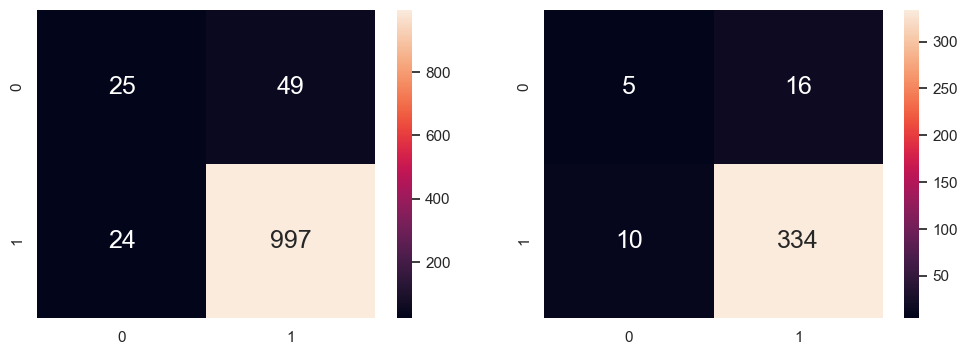

In [138]:
#Predict the CentralAir with the oq_train and oq_test
ca_train_pred3_yb = dectree3_yb.predict(yb_train)
ca_test_pred3_yb = dectree3_yb.predict(yb_test)

#Print the classification accuracy
print("The classification accuracy of YearBuilt Train\t:", dectree3_yb.score(yb_train, ca_train))
print("The classification accuracy of YearBuilt Test\t:", dectree3_yb.score(yb_test, ca_test))

print()

#Print the TPR and FPR for train set
cm3_tr_yb = confusion_matrix(ca_train, ca_train_pred3_yb)
FP_tr_3_yb = cm3_tr_yb[0][1]
FN_tr_3_yb = cm3_tr_yb[1][0]
TP_tr_3_yb = cm3_tr_yb[1][1]
TN_tr_3_yb = cm3_tr_yb[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_3_yb/(FN_tr_3_yb + TP_tr_3_yb))
print("The False Positive Rate of train set for this model \t:", TN_tr_3_yb/(TN_tr_3_yb + FP_tr_3_yb))

print()

#Print the TPR and FPR for test set
cm3_tt_yb = confusion_matrix(ca_test, ca_test_pred3_yb)
FP_tt_3_yb = cm3_tt_yb[0][1]
FN_tt_3_yb = cm3_tt_yb[1][0]
TP_tt_3_yb = cm3_tt_yb[1][1]
TN_tt_3_yb = cm3_tt_yb[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_3_yb/(FN_tt_3_yb + TP_tt_3_yb))
print("The False Positive Rate of test set for this model \t:", TN_tt_3_yb/(TN_tt_3_yb + FP_tt_3_yb))

#Print the two-way confusion map for train(left) and test(right)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ca_train, ca_train_pred3_yb),annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ca_test, ca_test_pred3_yb), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Problem 3 : Understanding the Misclassified Samples
**In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.<br>
(a) Print the Classification Tree of max depth 3 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.<br>
(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).**

[Text(0.5, 0.875, 'SalePrice <= 107700.0\ngini = 0.108\nsamples = 1095\nvalue = [63, 1032]\nclass = Y'),
 Text(0.25, 0.625, 'SalePrice <= 61191.5\ngini = 0.443\nsamples = 118\nvalue = [39, 79]\nclass = Y'),
 Text(0.125, 0.375, 'SalePrice <= 46000.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = N'),
 Text(0.375, 0.375, 'SalePrice <= 106125.0\ngini = 0.409\nsamples = 108\nvalue = [31, 77]\nclass = Y'),
 Text(0.3125, 0.125, 'gini = 0.385\nsamples = 100\nvalue = [26, 74]\nclass = Y'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = N'),
 Text(0.75, 0.625, 'SalePrice <= 137950.0\ngini = 0.048\nsamples = 977\nvalue = [24, 953]\nclass = Y'),
 Text(0.625, 0.375, 'SalePrice <= 137700.0\ngini = 0.129\nsamples = 216\nvalue = [15, 201]\nclass = Y'),
 Text(0.5625, 0.125, 'gini = 0.122\nsamples = 215\nvalue = [14, 201

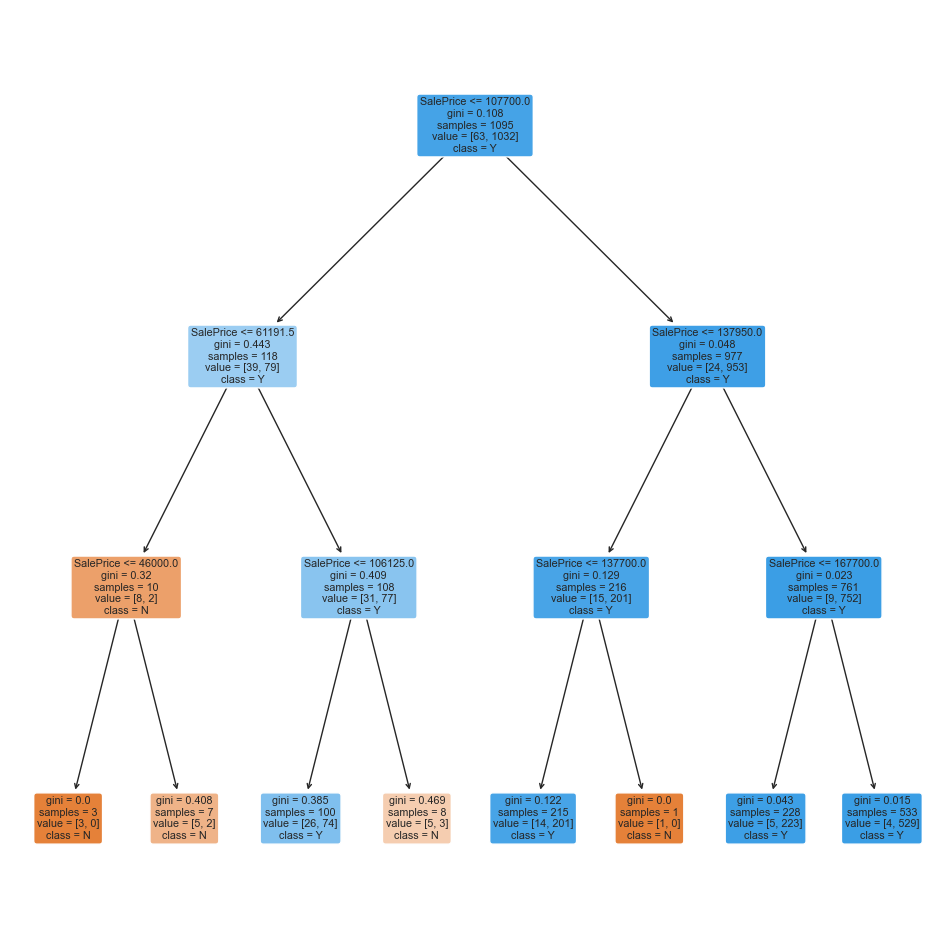

In [175]:
#redo the model

sp_train, sp_test, ca_train, cp_test = train_test_split(sp, ca, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(sp_train, ca_train)

#plot the decision tree
f = plt.figure(figsize=(12,12))

plot_tree(dectree, filled = True, rounded = True, feature_names = ["SalePrice"], class_names = ["N", "Y"])


### a) The SalePrice between 62000 and 106125, it has the gini value of 0.385 and the value of [26,74]

In [177]:
#combine the data set first
house_combine = pd.concat([sp_train, ca_train], axis = 1).reindex(sp_train.index)

#printing the data that end up in this data set
node = house_combine[(house_combine["SalePrice"]>=62000) & (house_combine["SalePrice"]<=106125)]
node

,SalePrice,CentralAir
1370,105000,Y
353,105900,Y
1404,105000,Y
227,106000,Y
637,93000,Y
...,...,...
1232,101800,Y
223,97000,Y
1143,80000,Y
638,85000,Y


### b) Print the only false positive cases

In [178]:
False_pos = node[node["CentralAir"]=='N']
False_pos

,SalePrice,CentralAir
61,101000,N
29,68500,N
749,98000,N
264,73000,N
456,98000,N
88,85000,N
1376,91000,N
821,93000,N
438,90350,N
1000,82000,N
